<a href="https://colab.research.google.com/github/oimo-taruto/CLT-simulation/blob/main/EPS%E3%81%A8%E6%A0%AA%E4%BE%A1%E5%A4%89%E5%8B%95%E3%81%AE%E7%9B%B8%E9%96%A2%E9%96%A2%E4%BF%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


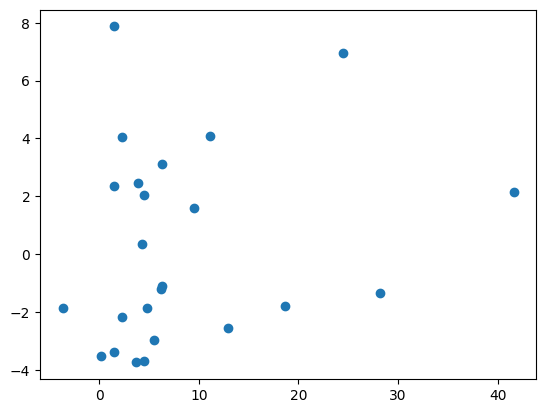

[[1.         0.19716813]
 [0.19716813 1.        ]]


[*********************100%***********************]  1 of 1 completed


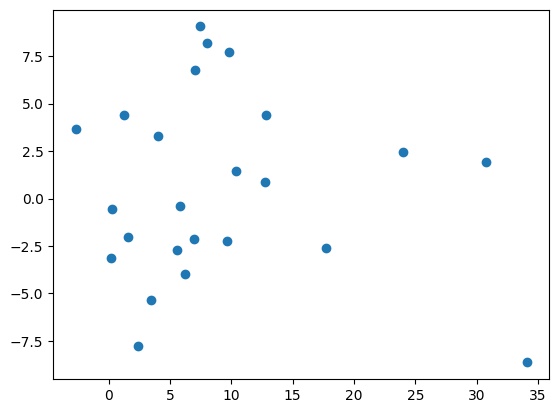

[[ 1.        -0.1084287]
 [-0.1084287  1.       ]]


[*********************100%***********************]  1 of 1 completed


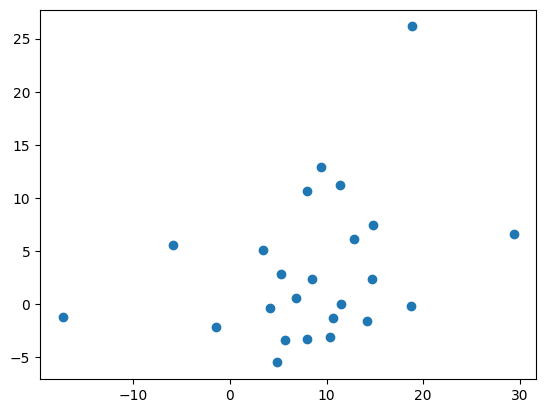

[[1.         0.33075745]
 [0.33075745 1.        ]]


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_earnings_impact(ticker_symbol):
  try:
    ticker_obj = yf.Ticker(ticker_symbol)

    earnings_dates = ticker_obj.get_earnings_dates()
    earnings_dates_list = [date.date() for date in earnings_dates.index]

    all_data = yf.download(tickers=ticker_symbol, period='max',auto_adjust=False)

    if isinstance(all_data.columns, pd.MultiIndex):
      all_data.columns = all_data.columns.get_level_values(0)

    df=all_data[['Open','High','Low','Close','Adj Close','Volume']].copy()
    df = df.reset_index()
    df['Nextday_Open'] = df['Open'].shift(-1)
    df['Nextday_Close'] = df['Close'].shift(-1)
    df['Volatility'] = (df['Nextday_Close'] - df['Close']) * 100 / df['Close']
    df['Volatility_after'] = (df['Nextday_Open'] - df['Close']) * 100 / df['Close'] # Corrected calculation for volatility after

    earnings_dates_dt = pd.to_datetime(earnings_dates_list)
    earnings_data = df[df['Date'].isin(earnings_dates_dt)]

    earnings_volatility = earnings_data['Volatility']

    df_ticker_symbol = pd.DataFrame(earnings_dates)

    earnings_data = earnings_data.reset_index()
    df_ticker_symbol = df_ticker_symbol.reset_index()

    earnings_data['Date'] = pd.to_datetime(earnings_data['Date']).dt.normalize().dt.tz_localize(None)
    df_ticker_symbol['Earnings Date'] = pd.to_datetime(df_ticker_symbol['Earnings Date']).dt.normalize().dt.tz_localize(None)

    merged_df = pd.merge(earnings_data, df_ticker_symbol, left_on='Date', right_on='Earnings Date')
    merged_df = merged_df.drop(columns=['Earnings Date'])

    x = merged_df['Surprise(%)']
    x2 = merged_df['EPS Estimate']
    x3 = merged_df['Reported EPS']
    y = merged_df['Volatility']
    y2 = merged_df['Volatility_after']

    plt.scatter(x, y2)
    plt.show()

    r11=np.corrcoef(x, y)
    r12=np.corrcoef(x, y2)
    r21=np.corrcoef(x2, y)
    r31=np.corrcoef(x3, y)

    print(r12)

    return merged_df

  except Exception as e:
    print(f"An error occured at {ticker_symbol}:{e}")
    return e

target_tickers=['AAPL','MSFT','NVDA']
results=[]
for s in target_tickers:
  results.append(get_earnings_impact(s))

final_all=pd.concat(results)